# UV excess in low mass stars

## Learning goals

By the end of this tutorial you will be able to:

- Understand UV excess in low mass stars
- Download data directly from URLs and handle data-frames
- Learn how to use a GUVcat catalog query and make selection cuts
- Create a color-color diagram
- **Tentatively**: Create a light curve out of gPhoton
- **Tentatively**: add Swift UVOT time-tagged observations based on metadata (depending on length of tutorial)
- **Tentatively**: add PS1 time series for low-cadence but longer baselines and multicolor (depending on length of tutorial)

## Introduction

**GALEX background**: The Galaxy Evolution Explorer (GALEX) was a satellite which mission was to produce an All-sky Imaiging Survey (AIS). It observed the sky in two different bands: in the Near UV (NUV) ($1750-27504$ Å) and in the Far UV (FUV) ($1350-1750$ Å). The GALEX database contains over 600 million source measurements in the ultraviolet domain, with some sources having more than one measurement, which could be useful to look for variability. Additionally, this survey has additionally been used to <a href="https://ui.adsabs.harvard.edu/abs/2008ApJ...689.1274S/abstract">accrete binaries</a> or <a href="https://ui.adsabs.harvard.edu/abs/2017ApJ...841...33M/abstract">AGB chromospheres</a>.

**Light curve background**: a light curve represents the brightness variation of an object studied over a period of time. This tool is simple but powerful, especially useful for time-variable objects such as supernovae or variable stars. The plot can show brightness (magnitude) over time, but it can also be represented as any other measure of brightness, such as the count of the number of X-rays over time.

**Defining some terms**:
- **Color-color diagram**:diagram used to compare the apparent magnitudes of objects at different wavelengths.
- **AGB**: Asymptotic Giant Branch. This corresponds to an area of the Herzsprung-Russell diagram where evolved cool luminous stars are found, all low to intermediate mass (0.5-8 solar masses) undergo this period of stellar evolution.

## Imports

- _wget_ to download files directly from URLs.
- _os_ to use functions from the operating system, we will use this to unzip _.gz_ files.
- _pandas_ for data handling, such as _.csv_ files.
- _numpy_ to work with arrays.
- _astroquery.simbad_ to query the SIMBAD catalog.
- _matplotlib.pyplot_ for plotting data.

In [86]:
import wget
import os
import pandas as pd
import numpy as np
from astroquery.simbad import Simbad
import matplotlib.pyplot as plt

_**Warning**: you may need to donwload gPhoton if you have not installed it previously, information about how to install it can be found in the following <a href="https://archive.stsci.edu/prepds/gphoton/#installation">link</a>_.

## GALEX catalog

The GALEX catalog can be accessed via the <a href="http://dolomiti.pha.jhu.edu/uvsky/#GUVcat">author's web site</a>, through <a href="http://mastweb.stsci.edu/gcasjobs">MAST casjobs</a> or from the <a href="https://vizier.cds.unistra.fr/viz-bin/VizieR">SIMBAD Vizier database</a>. Through this tutorial we will use the first approach, and download the data directly from the <a href="http://dolomiti.pha.jhu.edu/uvsky/GUVcat/GUVcat_AIS.html">GALEX catalogs of unique UV sources</a>, but the user is welcome to explore the documentation of the two other options and compare. 

For the example presented here, since we will be focusing on the TW Hydrae Association which has a Galactic latitude around $+26º.5$, we will be using the _.csv_ file _GUVCat_AIS_FOV055_glat25_00N__30_00N_. The naming convention for the GUVcat catalog is as follows:
- _AIS_ corresponds to the name of the catalog, _All-sky Imaging Survey_.
- _FOV055_ refers to the 1.1 degree diameter of GALEX field-of-view. 
- _glat25_00N_30_00N_ is the lower and upper Galactic boundaries for this slice. _N_ to indicate the degrees are positive, and negative degrees are indicated with _S_.

More information about the naming convention can be found in the <a href="https://archive.stsci.edu/hlsps/guvcat/hlsp_guvcat_galex_imaging_all_fuv-nuv_v1_readme.txt">GCat README file</a>.

## Data download

Let's use now the _wget_ command to download the corresponding catalog:

In [11]:
url='http://dolomiti.pha.jhu.edu/uvsky/GUVcat/GUVcat_AIS_FOV055/2019/5deglatslices/GUVCat_AIS_FOV055_glat25_00N__30_00N.csv.gz'
wget.download(url)

'GUVCat_AIS_FOV055_glat25_00N__30_00N.csv.gz'

The file has automatically be saved to our current working directory with the filename displayed above. In the <a href="http://dolomiti.pha.jhu.edu/uvsky/GUVcat/GUVcat_AIS.html">GALEX catalogs of unique UV sources</a> all the available catalogs can be accessed in case the reader is curious.

_**Heads-up**: this download may take up to a few minutes._

Since the files are compressed, the first step to treat the data is decompress them, in order to do that we can use _gunzip_ option from the _os_ module in Python:

In [13]:
filename = 'GUVCat_AIS_FOV055_glat25_00N__30_00N.csv.gz'
os.system('gunzip ' + filename)

0

The _.gz_ file has been replace by a _.csv_ file in our current working directory with the same filename as before. Now let's explore the different columns this catalog has, one way to load a _.csv_ file is to use the function _read_csv_ from the _pandas_ module:

In [61]:
GUVCat_25_30 = pd.read_csv('GUVCat_AIS_FOV055_glat25_00N__30_00N.csv',low_memory=False)

## File structure and data accessing

Let's display the different column names for the downloaded catalog:

In [3]:
print(GUVCat_25_30.columns.values)

['objid' 'photoextractid' 'mpstype' 'avaspra' 'avaspdec' 'fexptime'
 'nexptime' 'ra' 'dec' 'glon' 'glat' 'tilenum' 'img' 'subvisit'
 'fov_radius' 'type' 'band' 'e_bv' 'istherespectrum' 'chkobj_type'
 'fuv_mag' 'fuv_magerr' 'nuv_mag' 'nuv_magerr' 'fuv_mag_auto'
 'fuv_magerr_auto' 'nuv_mag_auto' 'nuv_magerr_auto' 'fuv_mag_aper_4'
 'fuv_magerr_aper_4' 'nuv_mag_aper_4' 'nuv_magerr_aper_4' 'fuv_mag_aper_6'
 'fuv_magerr_aper_6' 'nuv_mag_aper_6' 'nuv_magerr_aper_6' 'fuv_artifact'
 'nuv_artifact' 'fuv_flags' 'nuv_flags' 'fuv_flux' 'fuv_fluxerr'
 'nuv_flux' 'nuv_fluxerr' 'fuv_x_image' 'fuv_y_image' 'nuv_x_image'
 'nuv_y_image' 'fuv_fwhm_image' 'nuv_fwhm_image' 'fuv_fwhm_world'
 'nuv_fwhm_world' 'nuv_class_star' 'fuv_class_star' 'nuv_ellipticity'
 'fuv_ellipticity' 'nuv_theta_j2000' 'nuv_errtheta_j2000'
 'fuv_theta_j2000' 'fuv_errtheta_j2000' 'fuv_ncat_fwhm_image'
 'fuv_ncat_flux_radius_3' 'nuv_kron_radius' 'nuv_a_world' 'nuv_b_world'
 'fuv_kron_radius' 'fuv_a_world' 'fuv_b_world' 'nuv_weight' '

The different columns included are explained in <a href="https://arxiv.org/pdf/1704.05903.pdf">Bianchi et al. 2017</a>. Some relevant identifiers are:

- _objid_: GALEX identifier for the source.
- _ra_: source’s Right Ascension (degrees).
- _dec_: source’s Declination (degrees).
- _fuv/nuv_mag_: FUV/NUV calibrated magnitude.
- _fuv/nuv_flux_: FUV/NUV calibrated flux (micro Jansky).

Let's take a look now at how the catalog data look like:

In [4]:
GUVCat_25_30

,objid,photoextractid,mpstype,avaspra,avaspdec,fexptime,nexptime,ra,dec,glon,...,groupgiddist,groupgidtot,difffuv,diffnuv,difffuvdist,diffnuvdist,sepas,sepasdist,inlargeobj,largeobjsize
0,6370915763004377599,6370915763003326464,AIS,283.536309,77.021260,109.0,109.0,284.974027,77.231293,108.713890,...,6370915763004377599,6370915763004377599,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,6370915763004377601,6370915763003326464,AIS,283.536309,77.021260,109.0,109.0,285.416433,77.232453,108.731610,...,6370915763004377601,6370915763004377601,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,6370915763004377602,6370915763003326464,AIS,283.536309,77.021260,109.0,109.0,284.912987,77.233466,108.714070,...,6370915763004377602,6370915763004377602,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,6370915763004377604,6370915763003326464,AIS,283.536309,77.021260,109.0,109.0,282.320103,77.231828,108.632340,...,6370915763004377604,6370915763004377604,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,6370915763004377605,6370915763003326464,AIS,283.536309,77.021260,109.0,109.0,282.295966,77.236383,108.636790,...,6370915763004377605,6370915763004377605,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923423,6383441428459031767,6383441428457979904,AIS,250.942286,-6.230505,163.1,163.1,250.741181,-5.725562,11.546722,...,6383441428459031767,6383441428459031767,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3923424,6383441428459031778,6383441428457979904,AIS,250.942286,-6.230505,163.1,163.1,250.852851,-5.693120,11.644462,...,6383441428459031778,6383441428459031778,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3923425,6383441428461127550,6383441428457979904,AIS,250.942286,-6.230505,163.1,163.1,250.532926,-6.157141,11.023189,...,6383441428461127550,6383441428461127550,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3923426,6383441428461128154,6383441428457979904,AIS,250.942286,-6.230505,163.1,163.1,250.634061,-5.983922,11.243939,...,6383441428461128154,6383441428461128154,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


If we wanted to display only the GALEX identifiers for example, we would have to provide between brackets the column name 'objid' as follows:

In [5]:
print(GUVCat_25_30['objid'])

0          6370915763004377599
1          6370915763004377601
2          6370915763004377602
3          6370915763004377604
4          6370915763004377605
                  ...         
3923423    6383441428459031767
3923424    6383441428459031778
3923425    6383441428461127550
3923426    6383441428461128154
3923427    6383441428461128367
Name: objid, Length: 3923428, dtype: int64


This returns a specific column from our data frame. If, on the other hand, we want to access a specific row we could do so by specifying the row number with the _iloc_ function:

In [6]:
print(GUVCat_25_30.iloc[0])

objid             6370915763004377599
photoextractid    6370915763003326464
mpstype                           AIS
avaspra                    283.536309
avaspdec                     77.02126
                         ...         
diffnuvdist                       0.0
sepas                             0.0
sepasdist                         0.0
inlargeobj                        NaN
largeobjsize                      0.0
Name: 0, Length: 95, dtype: object


Finally, if we wanted to display only a specific value from our data-frame we would need to specify the row number and the column name:

In [7]:
print('GUVCat_25_30.iloc[0][objid] = ',GUVCat_25_30.iloc[0]['objid'])

GUVCat_25_30.iloc[0][objid] =  6370915763004377599


## Data reduction

Before making any selection cuts, let's see how many sources we have in the selected catalog:

In [66]:
n_total = len(GUVCat_25_30)
print('Number of elements: '+str(len(GUVCat_25_30)))

Number of elements: 3923428


### Selection criteria: coordinates of the TWA

Since we want to create a color-color comparison using the GALEX catalog, we can select a sample of young, low-mass stars such as the TW Hydrae Association. Since the GUVCat is divided in groupd every 5 degrees of galactic latitude, wa have selected those with a galactic latitude between 25 and 30 degrees. The coordinates of its members have been provided in a _.txt_ file along with this tutorial; the first column corresponds to the name of the star, the second to its galactic longitude and the third to its galactic latitude (both in degrees).

The first step for this process will be then to load this information using the _numpy_ function _loadtxt_. If we use the option _unpack=True_ we can directly separate the three columsn into different arrays to better handle them later. Additionally, _loadtxt_ assumes float as the standard input, so since the first column will correspond to strings, let's use the parameter _dtype_ to specify that the first column has a string (U) format, and the other two are floats (f).

In [203]:
names_TWA, glon_TWA, glat_TWA = np.loadtxt('TWA_coordinates_25_30.txt', unpack = True, dtype="U7,f8,f8")

In [204]:
print('Name of the stars in the TWA: ', names_TWA)

Name of the stars in the TWA:  ['TWA_2' 'TWA_5' 'TWA_23' 'TWA_26' 'TWA_30' 'TWA_30B' 'TWA_31' 'TWA_32'
 'TWA_33']


In [205]:
print('Galactic longitude coordinate of the stars in the TWA: ', glon_TWA)

Galactic longitude coordinate of the stars in the TWA:  [277.95102138 284.87408232 292.3486489  285.68451066 283.31811612
 283.30889319 292.22347037 297.03974302 285.14291101]


In [206]:
print('Galactic latitude of the stars in the TWA: ', glat_TWA)

Galactic latitude of the stars in the TWA:  [27.83910412 25.46047535 29.18289511 28.47365048 29.50905281 29.5298417
 29.43490044 29.32020358 29.71013373]


Now that we have correctly loaded the data from the _.txt_ file, we can use the coordiantes of each star to select the entries from the _GUVCat_25_30_ catalog that we want. Let's first see how to do it for only one star, 'TWA 2', and select the NUV magnitude for it. 

In [215]:
TWA_2 = GUVCat_25_30[(GUVCat_25_30['glon'] > (glon_TWA[0]-0.001))& (GUVCat_25_30['glon'] < (glon_TWA[0]+0.001)) & (GUVCat_25_30['glat'] > (glat_TWA[0]-0.001))  & (GUVCat_25_30['glat'] < (glat_TWA[0]+0.001))]

TWA_2

,objid,photoextractid,mpstype,avaspra,avaspdec,fexptime,nexptime,ra,dec,glon,...,groupgiddist,groupgidtot,difffuv,diffnuv,difffuvdist,diffnuvdist,sepas,sepasdist,inlargeobj,largeobjsize
3591520,6386924674855469360,6386924674852323328,AIS,167.226358,-29.590736,109.0,109.0,167.307493,-30.027679,277.95111,...,6386924674855469360+6386924705993985726,6386924674855469360+6386924705993985726,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [218]:
print('NUV magnitude of TWA 2: ',float(TWA_2['nuv_mag']))

NUV magnitude of TWA 2:  17.928202


Now, let's do this for the whole TWA and see how many stars we can find in the catalog:

In [246]:
n = len(glon_TWA)
NUV_TWA = np.zeros(n)

for i in range(n):
    
    tol = 0.001
    TWAobj = GUVCat_25_30[(GUVCat_25_30['glon'] > (glon_TWA[i]-tol))& (GUVCat_25_30['glon'] < (glon_TWA[i]+tol)) & (GUVCat_25_30['glat'] > (glat_TWA[i]-tol))  & (GUVCat_25_30['glat'] < (glat_TWA[i]+tol))]
    if len(TWAobj) == 1:
        NUV_TWA[i] = float(TWAobj['nuv_mag'])
    
print('NUV magnitudes of TWA: ',NUV_TWA)

NUV magnitudes of TWA:  [17.928202 17.820465 19.753916  0.       22.485006  0.       20.674789
 19.032324  0.      ]


## SIMBAD catalog

To create the color-color diagram we need additional bands to perform the comparison. In order to do so, we can use some of the bands provided by the SIMBAD catalog ($K - 2.159 \mu m, V - 0.540 \mu m$). In order to do that, we should add the votable fields 'flux(K)' and 'flux(V)' to the Simbad query with the following command:

In [88]:
Simbad.add_votable_fields('flux(K)','flux(V)')

Even though the votable field that we have added says 'flux', this will provide us with the magnitude in those band, let's check it for our first star, 'TWA 1':

In [240]:
table_twa2 = Simbad.query_object('TWA 2')

table_twa2

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_K,FLUX_V,FLUX_K_1,FLUX_V_1,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,float32,int32
CD-29 8887,11 09 13.7928,-30 01 39.968,14,14,0.148,0.152,90,A,O,2020yCat.1350....0G,6.71,11.119,6.71,11.119,1


As you can see, below the name 'FLUX_K' it indicates it is a magnitude! So now let's do it for the whole TWA using the _names_TWA_ array. 

_**Note**: some elements may not have either the V or K magnitude, such as 'TWA 11B', which is displayed below for the reader to see the problematic values._

In [242]:
table_twa31 = Simbad.query_object('TWA 31')

table_twa31

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_K,FLUX_V,FLUX_K_1,FLUX_V_1,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,float32,int32
TWA 31,12 07 10.8883,-32 30 53.755,14,14,0.038,0.028,90,A,O,2020yCat.1350....0G,12.115,--,12.115,--,1


These elements will appear as NaN when converted to float numbers. A way to check if a value is NaN in Python is to check if it is not equal to itself, we will use this to flag the missing values.

In [252]:
n = len(names_TWA)
magK_TWA = []
magV_TWA = []
missing_val_i = []
    
for i in range(n):
    table = Simbad.query_object(names_TWA[i])
    if (float(table['FLUX_V']) != float(table['FLUX_V'])):
        print('Missing V-band magnitude: ',names_TWA[i])
        missing_val_i.append(i)
        magK_TWA.append(float(table['FLUX_K']))
        magV_TWA.append(0)
        continue
    elif (float(table['FLUX_K']) != float(table['FLUX_K'])):
        print('Missing K-band magnitude: ',names_TWA[i])
        missing_val_i.append(i)
        magK_TWA.append(0)
        magV_TWA.append(float(table['FLUX_V']))
        continue
    else:
        magK_TWA.append(float(table['FLUX_K']))
        magV_TWA.append(float(table['FLUX_V']))

Missing V-band magnitude:  TWA_26
Missing V-band magnitude:  TWA_30
Missing V-band magnitude:  TWA_30B
Missing V-band magnitude:  TWA_31


<ipython-input-252-bda1469fd378>:8: UserWarning: Warning: converting a masked element to nan.
  if (float(table['FLUX_V']) != float(table['FLUX_V'])):
<ipython-input-252-bda1469fd378>:8: UserWarning: Warning: converting a masked element to nan.
  if (float(table['FLUX_V']) != float(table['FLUX_V'])):
<ipython-input-252-bda1469fd378>:8: UserWarning: Warning: converting a masked element to nan.
  if (float(table['FLUX_V']) != float(table['FLUX_V'])):
<ipython-input-252-bda1469fd378>:8: UserWarning: Warning: converting a masked element to nan.
  if (float(table['FLUX_V']) != float(table['FLUX_V'])):


After removing the missing values, we are still left with 35 stars, this can be checked by looking at the length of the _magK_TWA_ and _magV_TWA_ lists:

In [253]:
print(len(magK_TWA))

9


We will convert now the lists we created to numpy arrays in order to better handle them. 

In [254]:
magK_TWA = np.array(magK_TWA)
magV_TWA = np.array(magV_TWA)

## Matching GUVCat to SIMBAD

Since some values were missing for both the NUV and the V band magnitudes, we need to perform a match between both to only keep those stars that have both measurements.

In [256]:
matched_i = []

for i in range(len(names_TWA)):
    if (NUV_TWA[i] != 0.) & (i not in missing_val_i):
        matched_i.append(i)
        
matched_i

[0, 1, 2, 7]

## Color-color diagram

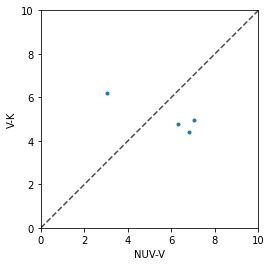

In [259]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(NUV_TWA[matched_i]-magV_TWA[matched_i],magV_TWA[matched_i]-magK_TWA[matched_i],'o',markersize=3)
plt.plot([0, 10], [0, 10], ls="--", c=".3")
plt.xlim([0,10])
plt.ylim([0,10])
ax.set_aspect('equal')
plt.xlabel('NUV-V')
plt.ylabel('V-K')
plt.show()

## Exercises

## Additional Resources

For more information about the MAST archive and details about mission data: 

<a href="https://mast.stsci.edu/api/v0/index.html">MAST API</a> <br>
<a href="https://archive.stsci.edu/hlsp/guvcat">GALEX UV Unique Source Catalogs</a> <br> 

## About this Notebook

**Author**: Clara Puerto Sánchez <br>
**Updated on**: 20/07/2022

<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>